In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/caihanzhe/Desktop/Python/Comoros/BirdNet_MoreData/df_1min_aver.csv')

In [3]:
data

,1,2,3,4,5,6,7,8,9,10,...,Forest_Cover,alt,alt_level,PC1,PC2,PC3,PC4,UMAP1,UMAP2,day_night
0,0.737747,0.321804,0.199757,1.148175,0.617247,0.068538,0.164663,0.055251,0.115827,0.222751,...,Medium,966,Medium,-2.544192,-3.451008,-1.630348,-1.609008,3.858816,-5.763158,Day
1,0.744160,0.398255,0.285658,1.220065,0.601682,0.100306,0.221565,0.084049,0.098012,0.230972,...,Medium,966,Medium,-2.508890,-3.368652,-1.652775,-1.609419,3.859192,-5.763576,Day
2,0.743534,0.502413,0.236235,1.068902,0.321240,0.203735,0.291291,0.127624,0.022790,0.223548,...,Medium,966,Medium,-1.606292,-3.545845,-1.302532,-1.359263,3.842917,-5.743116,Day
3,0.737687,0.266936,0.217434,0.935921,0.423511,0.207963,0.083609,0.080737,0.112797,0.228495,...,Medium,966,Medium,-2.224425,-3.394017,-1.536243,-1.297245,3.856705,-5.759783,Day
4,0.698215,0.371960,0.216048,0.950592,0.604693,0.193568,0.096358,0.105427,0.097938,0.293194,...,Medium,966,Medium,-2.160440,-3.564458,-1.542103,-1.612592,3.869072,-5.777508,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,0.172305,0.201551,0.099482,0.655344,0.346617,0.045257,0.007022,0.329275,0.088447,0.730226,...,Medium,1471,High,-0.911386,-4.708406,-0.811609,-1.264652,0.215334,-2.138647,Night
5725,0.076707,0.192777,0.151829,0.706951,0.353370,0.070909,0.041273,0.188589,0.120235,0.522149,...,Medium,1471,High,-2.000002,-3.662748,-0.987495,-1.152131,0.116529,-1.528592,Night
5726,0.130333,0.177402,0.102814,0.640438,0.381724,0.173471,0.059907,0.271900,0.161195,0.488801,...,Medium,1471,High,-2.152045,-3.266132,-0.999653,-0.950986,0.087754,-1.505095,Night
5727,0.124633,0.281102,0.076158,0.417014,0.482330,0.079683,0.022426,0.291933,0.070392,0.786848,...,Medium,1471,High,-1.620292,-4.264374,-1.038010,-1.029228,0.115631,-1.638079,Night


In [ ]:
data_select = data.iloc[:, 1:1024].values

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_select)

In [ ]:
reducer = umap.UMAP(random_state=42)
data_2d = reducer.fit_transform(data_scaled)

In [ ]:
data['UMAP1'] = data_2d[:, 0]
data['UMAP2'] = data_2d[:, 1]

In [ ]:
## Affinity Propagation
## keep results
# AP_results = []
# sites = data['site_code'].unique()
## Apply affinity propagation to all site
# for site in sites:
#     site_data = data[data['site_code'] == site]

    # get UMAP data
X = data[['UMAP1', 'UMAP2']]

    # do affnity propagation
affinity_propagation = AffinityPropagation(
                                            damping=0.7,max_iter = 100, 
                                            convergence_iter= 10,
                                            affinity='euclidean',
                                            random_state = 42).fit(X)
labels = affinity_propagation.labels_

    # get number of clusters
num_clusters = len(set(labels))

    # get Silhouette Score
#     if num_clusters > 1:
#         silhouette_avg = silhouette_score(X, labels)
#     else:
#         silhouette_avg = float('0')  #  if there is only one clutser, print 0

    # save results
#    AP_results.append({'site': site, 'num_clusters': num_clusters, 'silhouette_score': silhouette_avg})

# save results to csv
# AP_results = pd.DataFrame(AP_results)
# AP_results.to_csv('/Users/caihanzhe/Desktop/Python/Comoros/BirdNet_MoreData/AP_results.csv', index=False)

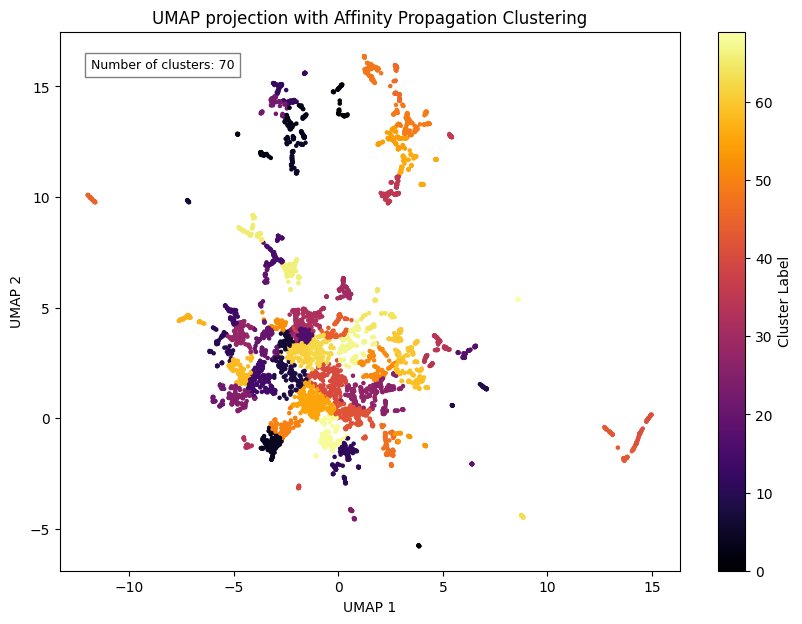

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(data['UMAP1'], data['UMAP2'], c=labels, cmap='inferno', s=5)
plt.colorbar(label='Cluster Label')
plt.text(0.05, 0.95, f'Number of clusters: {num_clusters}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.title('UMAP projection with Affinity Propagation Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()